In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
df = pd.read_csv(r'/Users/inyene2/Downloads/archive/Spotify 2010 - 2019 Top 100.csv')
df.head()



,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo


In [4]:
#Search for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

title - 0.0029910269192422734%
artist - 0.0029910269192422734%
top genre - 0.0029910269192422734%
year released - 0.0029910269192422734%
added - 0.0029910269192422734%
bpm - 0.0029910269192422734%
nrgy - 0.0029910269192422734%
dnce - 0.0029910269192422734%
dB - 0.0029910269192422734%
live - 0.0029910269192422734%
val - 0.0029910269192422734%
dur - 0.0029910269192422734%
acous - 0.0029910269192422734%
spch - 0.0029910269192422734%
pop - 0.0029910269192422734%
top year - 0.0029910269192422734%
artist type - 0.0029910269192422734%


In [6]:
df.dtypes

title             object
artist            object
top genre         object
year released    float64
added             object
bpm              float64
nrgy             float64
dnce             float64
dB               float64
live             float64
val              float64
dur              float64
acous            float64
spch             float64
pop              float64
top year         float64
artist type       object
dtype: object

In [13]:
#get rid of rows with null values
df = df.dropna()

#change data type of columns
df['year released'] = df['year released'].astype('int64')
df['top year'] = df['top year'].astype('int64')
df

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018,2020‑06‑22,155.0,73.0,83.0,-4.0,12.0,45.0,313.0,1.0,22.0,86.0,2019,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,2020‑06‑22,80.0,50.0,55.0,-9.0,80.0,41.0,190.0,23.0,7.0,85.0,2019,Solo
997,Boasty (feat. Idris Elba),Wiley,grime,2019,2020‑06‑22,103.0,77.0,89.0,-5.0,9.0,46.0,177.0,1.0,7.0,68.0,2019,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019,Duo


In [20]:
df = df.sort_values(by = ['pop'], inplace=False, ascending = False) 


In [18]:
pd.set_option('display.max_rows', None)

In [19]:
df

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010,Solo
5,Magic (feat. Rivers Cuomo),B.o.B,atl hip hop,2010,2022‑02‑17,82.0,93.0,55.0,-4.0,35.0,79.0,196.0,1.0,34.0,71.0,2010,Solo
6,The Time (Dirty Bit),Black Eyed Peas,dance pop,2010,2022‑02‑17,128.0,81.0,82.0,-8.0,60.0,44.0,308.0,7.0,7.0,75.0,2010,Band/Group
7,Imma Be,Black Eyed Peas,dance pop,2009,2022‑02‑17,92.0,52.0,60.0,-7.0,31.0,41.0,258.0,18.0,37.0,71.0,2010,Band/Group
8,Talking to the Moon,Bruno Mars,dance pop,2010,2022‑02‑17,146.0,59.0,50.0,-5.0,11.0,8.0,218.0,51.0,3.0,87.0,2010,Solo
9,Just the Way You Are,Bruno Mars,dance pop,2010,2022‑02‑17,109.0,84.0,64.0,-5.0,6.0,42.0,221.0,1.0,4.0,86.0,2010,Solo


In [21]:
df

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
392,Sweater Weather,The Neighbourhood,modern alternative rock,2013,2020‑06‑11,124.0,81.0,61.0,-3.0,10.0,40.0,240.0,5.0,3.0,95.0,2013,Band/Group
394,Another Love,Tom Odell,chill pop,2013,2020‑06‑11,123.0,54.0,45.0,-9.0,9.0,13.0,244.0,70.0,4.0,94.0,2013,Solo
211,Locked out of Heaven,Bruno Mars,dance pop,2012,2020‑06‑11,144.0,70.0,73.0,-4.0,31.0,87.0,233.0,5.0,4.0,91.0,2012,Solo
809,lovely (with Khalid),Billie Eilish,art pop,2018,2020‑06‑22,115.0,30.0,35.0,-10.0,10.0,12.0,200.0,93.0,3.0,91.0,2018,Solo
231,Lost,Frank Ocean,alternative r&b,2012,2020‑06‑22,123.0,60.0,91.0,-5.0,17.0,50.0,234.0,3.0,23.0,91.0,2012,Solo
736,Believer,Imagine Dragons,modern rock,2017,2021‑01‑28,125.0,78.0,78.0,-4.0,8.0,67.0,204.0,6.0,13.0,91.0,2017,Band/Group
316,Locked out of Heaven,Bruno Mars,dance pop,2012,2020‑06‑11,144.0,70.0,73.0,-4.0,31.0,87.0,233.0,5.0,4.0,91.0,2013,Solo
914,lovely (with Khalid),Billie Eilish,art pop,2018,2020‑06‑22,115.0,30.0,35.0,-10.0,10.0,12.0,200.0,93.0,3.0,91.0,2019,Solo
442,All of Me,John Legend,neo soul,2013,2020‑06‑10,120.0,26.0,42.0,-7.0,13.0,33.0,270.0,92.0,3.0,90.0,2014,Solo
302,Why'd You Only Call Me When You're High?,Arctic Monkeys,garage rock,2013,2020‑06‑11,92.0,63.0,69.0,-6.0,10.0,80.0,161.0,5.0,4.0,90.0,2013,Band/Group


<function matplotlib.pyplot.show(close=None, block=None)>

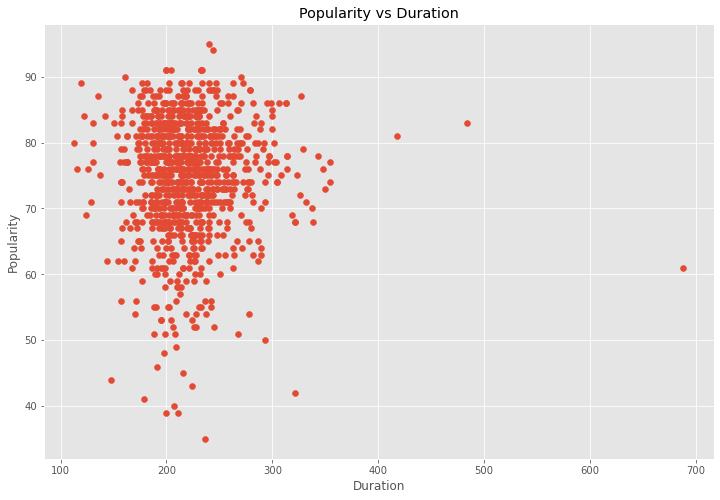

In [25]:
#Scatter plot popularity vs duration

plt.scatter(x=df['dur'],y=df['pop'])
plt.title('Popularity vs Duration')
plt.xlabel('Duration')
plt.ylabel('Popularity')
plt.show

<AxesSubplot:xlabel='dur', ylabel='pop'>

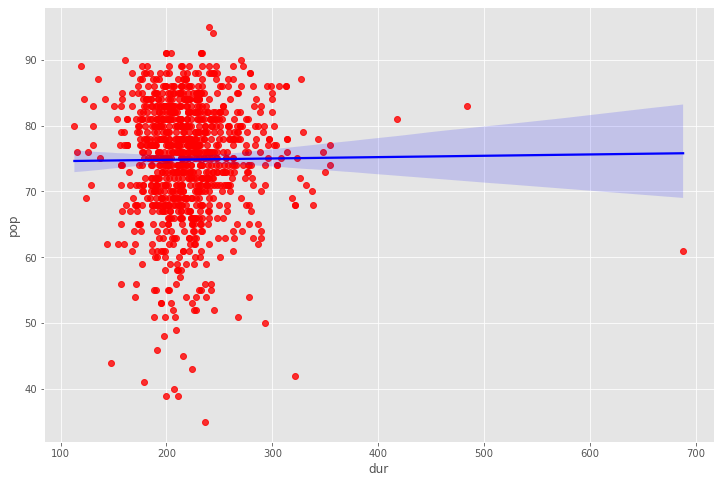

In [27]:
#plot popularity vs duration using seaborn

sns.regplot(x='dur',y='pop',data=df,scatter_kws={"color": "red"},line_kws={"color": "blue"})

In [33]:
#Look at correlation

df.corr(method='pearson') #pearson, kendall, spearman

,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year
year released,1.000000,-0.017916,-0.237744,0.222459,-0.116566,-0.115106,-0.091306,-0.248134,0.151539,0.149373,0.182793,0.854339
bpm,-0.017916,1.000000,0.118557,-0.111660,0.089568,0.014672,0.021128,-0.016536,-0.124614,0.149368,-0.025058,-0.016887
nrgy,-0.237744,0.118557,1.000000,-0.129279,0.713428,0.184094,0.372866,-0.049662,-0.504083,-0.099790,-0.234011,-0.302535
dnce,0.222459,-0.111660,-0.129279,1.000000,-0.040538,-0.113324,0.264781,-0.168483,-0.075999,0.161734,0.093176,0.218019
dB,-0.116566,0.089568,0.713428,-0.040538,1.000000,0.128134,0.317128,-0.082541,-0.392393,-0.165838,-0.145403,-0.173286
live,-0.115106,0.014672,0.184094,-0.113324,0.128134,1.000000,0.028092,-0.003094,-0.116081,0.043516,-0.137305,-0.121331
val,-0.091306,0.021128,0.372866,0.264781,0.317128,0.028092,1.000000,-0.185863,-0.164048,0.013192,-0.003752,-0.122825
dur,-0.248134,-0.016536,-0.049662,-0.168483,-0.082541,-0.003094,-0.185863,1.000000,0.026474,-0.035451,0.009219,-0.215213
acous,0.151539,-0.124614,-0.504083,-0.075999,-0.392393,-0.116081,-0.164048,0.026474,1.000000,-0.010204,0.128195,0.181747
spch,0.149373,0.149368,-0.099790,0.161734,-0.165838,0.043516,0.013192,-0.035451,-0.010204,1.000000,0.061441,0.165890


In [30]:
#No significant correlation between characteristics of song and its popularity
#However some characteristics are inversely related

<function matplotlib.pyplot.show(close=None, block=None)>

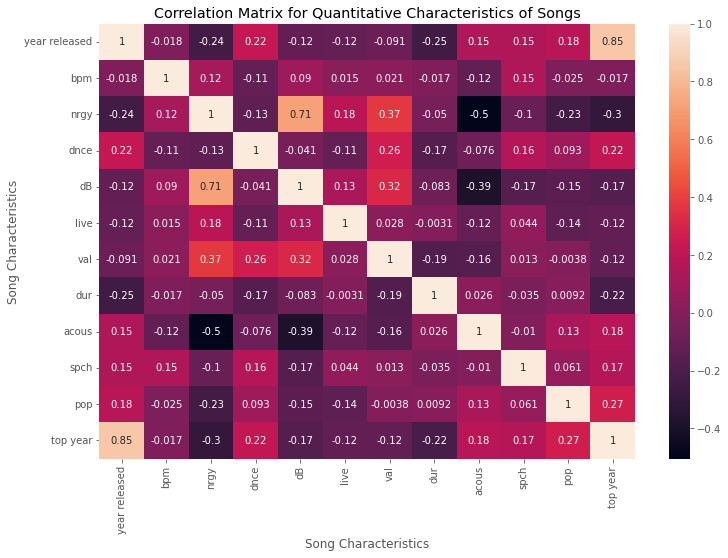

In [36]:
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Quantitative Characteristics of Songs')
plt.xlabel('Song Characteristics')
plt.ylabel('Song Characteristics')

plt.show

In [37]:
df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
392,Sweater Weather,The Neighbourhood,modern alternative rock,2013,2020‑06‑11,124.0,81.0,61.0,-3.0,10.0,40.0,240.0,5.0,3.0,95.0,2013,Band/Group
394,Another Love,Tom Odell,chill pop,2013,2020‑06‑11,123.0,54.0,45.0,-9.0,9.0,13.0,244.0,70.0,4.0,94.0,2013,Solo
211,Locked out of Heaven,Bruno Mars,dance pop,2012,2020‑06‑11,144.0,70.0,73.0,-4.0,31.0,87.0,233.0,5.0,4.0,91.0,2012,Solo
809,lovely (with Khalid),Billie Eilish,art pop,2018,2020‑06‑22,115.0,30.0,35.0,-10.0,10.0,12.0,200.0,93.0,3.0,91.0,2018,Solo
231,Lost,Frank Ocean,alternative r&b,2012,2020‑06‑22,123.0,60.0,91.0,-5.0,17.0,50.0,234.0,3.0,23.0,91.0,2012,Solo


In [38]:
#Numerized object types in df
df_numerized=df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
    
df_numerized

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
392,757,388,109,2013,2,124.0,81.0,61.0,-3.0,10.0,40.0,240.0,5.0,3.0,95.0,2013,0
394,49,403,42,2013,2,123.0,54.0,45.0,-9.0,9.0,13.0,244.0,70.0,4.0,94.0,2013,2
211,443,59,51,2012,2,144.0,70.0,73.0,-4.0,31.0,87.0,233.0,5.0,4.0,91.0,2012,2
809,937,47,12,2018,5,115.0,30.0,35.0,-10.0,10.0,12.0,200.0,93.0,3.0,91.0,2018,2
231,451,134,9,2012,5,123.0,60.0,91.0,-5.0,17.0,50.0,234.0,3.0,23.0,91.0,2012,2
736,80,157,111,2017,10,125.0,78.0,78.0,-4.0,8.0,67.0,204.0,6.0,13.0,91.0,2017,0
316,443,59,51,2012,2,144.0,70.0,73.0,-4.0,31.0,87.0,233.0,5.0,4.0,91.0,2013,2
914,937,47,12,2018,5,115.0,30.0,35.0,-10.0,10.0,12.0,200.0,93.0,3.0,91.0,2019,2
442,38,175,113,2013,1,120.0,26.0,42.0,-7.0,13.0,33.0,270.0,92.0,3.0,90.0,2014,2
302,893,23,80,2013,2,92.0,63.0,69.0,-6.0,10.0,80.0,161.0,5.0,4.0,90.0,2013,0


<function matplotlib.pyplot.show(close=None, block=None)>

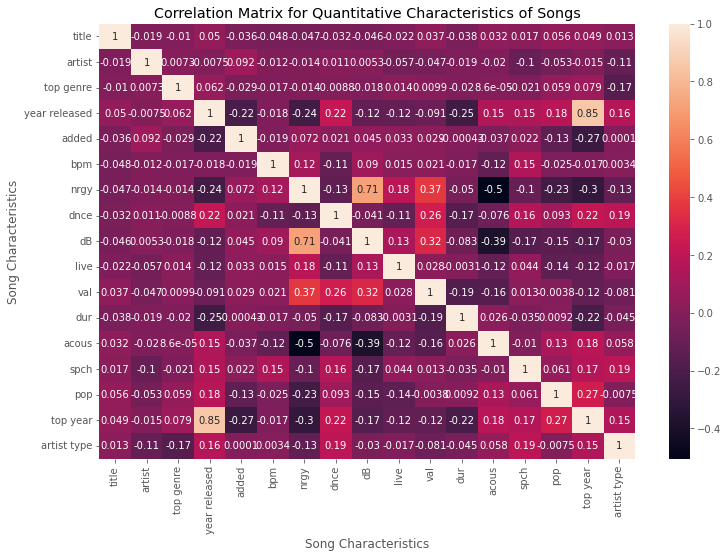

In [39]:
correlation_matrix=df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Quantitative Characteristics of Songs')
plt.xlabel('Song Characteristics')
plt.ylabel('Song Characteristics')

plt.show

In [40]:
#Correlation matrix of every song characteristic

In [41]:
df_numerized.corr()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
title,1.000000,-0.018633,-0.009974,0.050420,-0.035695,-0.047679,-0.047179,-0.031647,-0.045699,-0.022304,0.037240,-0.038144,0.031684,0.016781,0.056065,0.048853,0.013396
artist,-0.018633,1.000000,0.007274,-0.007527,0.091797,-0.011992,-0.013831,0.010618,0.005286,-0.057421,-0.047224,-0.019133,-0.019748,-0.102472,-0.052592,-0.014952,-0.108608
top genre,-0.009974,0.007274,1.000000,0.061864,-0.029230,-0.017454,-0.014095,-0.008795,-0.017522,0.014396,0.009912,-0.019907,0.000086,-0.021381,0.059301,0.078838,-0.166899
year released,0.050420,-0.007527,0.061864,1.000000,-0.215594,-0.017916,-0.237744,0.222459,-0.116566,-0.115106,-0.091306,-0.248134,0.151539,0.149373,0.182793,0.854339,0.160611
added,-0.035695,0.091797,-0.029230,-0.215594,1.000000,-0.018993,0.071616,0.020882,0.045174,0.033048,0.029407,-0.000431,-0.037254,0.022409,-0.130116,-0.272608,0.000104
bpm,-0.047679,-0.011992,-0.017454,-0.017916,-0.018993,1.000000,0.118557,-0.111660,0.089568,0.014672,0.021128,-0.016536,-0.124614,0.149368,-0.025058,-0.016887,0.003363
nrgy,-0.047179,-0.013831,-0.014095,-0.237744,0.071616,0.118557,1.000000,-0.129279,0.713428,0.184094,0.372866,-0.049662,-0.504083,-0.099790,-0.234011,-0.302535,-0.127276
dnce,-0.031647,0.010618,-0.008795,0.222459,0.020882,-0.111660,-0.129279,1.000000,-0.040538,-0.113324,0.264781,-0.168483,-0.075999,0.161734,0.093176,0.218019,0.192161
dB,-0.045699,0.005286,-0.017522,-0.116566,0.045174,0.089568,0.713428,-0.040538,1.000000,0.128134,0.317128,-0.082541,-0.392393,-0.165838,-0.145403,-0.173286,-0.030464
live,-0.022304,-0.057421,0.014396,-0.115106,0.033048,0.014672,0.184094,-0.113324,0.128134,1.000000,0.028092,-0.003094,-0.116081,0.043516,-0.137305,-0.121331,-0.017186


In [42]:
correlation_mat=df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

title          title            1.000000
               artist          -0.018633
               top genre       -0.009974
               year released    0.050420
               added           -0.035695
               bpm             -0.047679
               nrgy            -0.047179
               dnce            -0.031647
               dB              -0.045699
               live            -0.022304
               val              0.037240
               dur             -0.038144
               acous            0.031684
               spch             0.016781
               pop              0.056065
               top year         0.048853
               artist type      0.013396
artist         title           -0.018633
               artist           1.000000
               top genre        0.007274
               year released   -0.007527
               added            0.091797
               bpm             -0.011992
               nrgy            -0.013831
               d

In [43]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

acous          nrgy            -0.504083
nrgy           acous           -0.504083
dB             acous           -0.392393
acous          dB              -0.392393
top year       nrgy            -0.302535
nrgy           top year        -0.302535
top year       added           -0.272608
added          top year        -0.272608
year released  dur             -0.248134
dur            year released   -0.248134
year released  nrgy            -0.237744
nrgy           year released   -0.237744
pop            nrgy            -0.234011
nrgy           pop             -0.234011
year released  added           -0.215594
added          year released   -0.215594
top year       dur             -0.215213
dur            top year        -0.215213
               val             -0.185863
val            dur             -0.185863
top year       dB              -0.173286
dB             top year        -0.173286
dnce           dur             -0.168483
dur            dnce            -0.168483
artist type    t

In [ ]:
#No significant correlation between characteristics of song and its popularity
#There is no secret formula to producing a banger